# **`SUPPORT VECTOR MACHINES - 3`**

Dataset link = https://drive.google.com/file/d/1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tejas05in/pwskills-Data_Science_Masters/master/machine%20learning/assignments/Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


"Total square foot" is object class and it needs to be chnaged to int

In [6]:
##missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Highest missing values in society and balcony

In [7]:
lcoation_mode = df.location.mode()[0]
size_mode = df["size"].mode()[0]
society_mode = df.society.mode()[0]

In [8]:
#imputing missing values
df.location.fillna(lcoation_mode,inplace=True)
df["size"].fillna(size_mode,inplace=True)
df.society.fillna(society_mode,inplace=True)
df.bath.fillna(df.bath.mean().round(),inplace=True)
df.balcony.fillna(df.balcony.mean().round(),inplace=True)

### type conversion

In [9]:
#assuming all units are in square foot
def dash_removal(s):
    if "-" in s:
        a = s.split("-")[0]
        b = s.split("-")[1]
        c = (float(a) + float(b)) / 2
        return str(c)
    elif "Sq." in s:
        a = s.split("Sq.")[0]
        b = float(a) * 10.7639
        return str(b)
    elif s.endswith("Perch"):
        a = s.strip("Perch")
        b = float(a) * 272.25
        return str(b)
    elif s.endswith("Acres"):
        a = s.strip("Acres")
        b = float(a) * 43560
        return str(b)
    elif s.endswith("Cents"):
        a = s.strip("Cents")
        b = float(a) * 435.6
        return str(b)
    elif s.endswith("Guntha"):
        a = s.strip("Guntha")
        b = float(a) * 1089
        return str(b)
    elif s.endswith("Grounds"):
        a = s.strip("Grounds")
        b = float(a) * 2400.35
        return str(b)
    else:
        return s

In [10]:
df.total_sqft =  df.total_sqft.apply(lambda x: dash_removal(x))

In [11]:
df.total_sqft =  df.total_sqft.astype(float)

In [12]:
#limiting the size only to number of bedrooms as that is the most important determinant in the house
df['size'] = df['size'].str.split().str[0].astype(int)

In [13]:
#description of data
df.describe()

,size,total_sqft,bath,balcony,price
count,13320.000000,1.332000e+04,13320.000000,13320.000000,13320.000000
mean,2.802778,1.912670e+03,2.694294,1.603378,112.565627
std,1.294496,1.727777e+04,1.337969,0.803067,148.971674
min,1.000000,1.000000e+00,1.000000,0.000000,8.000000
25%,2.000000,1.100000e+03,2.000000,1.000000,50.000000
50%,3.000000,1.278000e+03,2.000000,2.000000,72.000000
75%,3.000000,1.680000e+03,3.000000,2.000000,120.000000
max,43.000000,1.306800e+06,40.000000,3.000000,3600.000000


/tmp/ipykernel_91/4135273051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2),annot=True)


<AxesSubplot: >

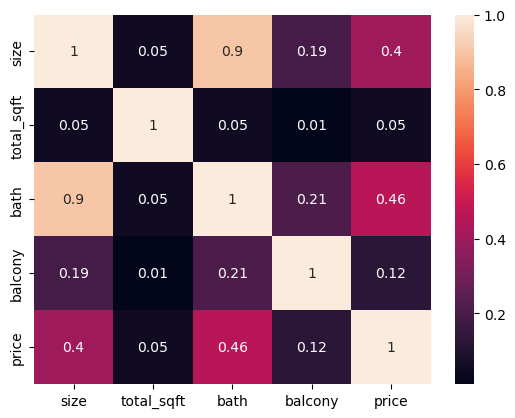

In [14]:
sns.heatmap(df.corr().round(2),annot=True)

### size correlates very well with bathroom but for present model we will include both features to test it out 

In [15]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [16]:
#performing one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [17]:
encoded  = encoder.fit_transform(df[['area_type', 'availability', 'location', 'society']]).toarray()

In [18]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [19]:
encoded_df

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13317,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
final = pd.concat([df,encoded_df],axis=1)

In [21]:
final.drop(['area_type', 'availability', 'location', 'society'],axis=1,inplace=True)

In [22]:
#Splitting into independent and dependent features
X = final.drop("price",axis=1)
y = final.price

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [24]:
X_train.shape,y_train.shape

((8924, 4082), (8924,))

In [25]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#model building
from sklearn.svm import SVR
regressor = SVR(kernel="linear")
regressor.fit(X_train_scaled,y_train)

SVR(kernel='linear')

In [28]:
y_pred = regressor.predict(X_test_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2",r2_score(y_test,y_pred))

MSE 18901.474728962527
MAE 41.7046984852349
RMSE 137.48263428143397
R2 0.29636473899457805


`Q1. In order to predict house price based on several characteristics, such as location, square footage,
number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this
situation would be the best to employ?`

In the case of SVM regression model, Mean Squared Error (MSE) is a widely used regression metric. MSE measures the average of the squared differences between predicted and actual values of the target variable. In the case of predicting house prices, MSE would be a good choice because it penalizes larger errors more heavily than smaller errors, which is desirable in situations where the cost of large errors is high. Additionally, MSE is a popular metric because it is differentiable, which allows for the use of gradient descent optimization algorithms to train the model.

`Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as
your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price
of a house as accurately as possible?`

If your goal is to predict the actual price of a house as accurately as possible, `then Mean Squared Error (MSE)` would be the more appropriate evaluation metric to use. MSE measures the average of the squared differences between predicted and actual values of the target variable, which directly reflects the magnitude of the errors in the predictions.

On the other hand, R-squared measures the proportion of variance in the target variable that is explained by the model. While R-squared can provide useful information about the overall performance of the model in explaining the variability in the target variable, it does not directly measure the magnitude of the errors in the predictions. Therefore, MSE would be a more appropriate metric to use if the goal is to minimize the errors in predicting house prices.

`Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate
regression metric to use with your SVM model. Which metric would be the most appropriate in this
scenario?`

When dealing with a dataset that has a significant number of outliers,` Mean Absolute Error (MAE)` would be the most appropriate regression metric to use with an SVM model. MAE is less sensitive to outliers than Mean Squared Error (MSE), which can be heavily influenced by large errors.

In contrast to MSE, MAE measures the average absolute difference between predicted and actual values of the target variable, which is less influenced by outliers. Therefore, MAE would be a more appropriate metric to use when dealing with a dataset that has a significant number of outliers. Additionally, MAE has the advantage of being more easily interpretable than MSE, as it represents the average magnitude of errors in the predictions in the original units of the target variable.

`Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best
metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values
are very close. Which metric should you choose to use in this case?`

In the case where both Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are very close, either metric can be used to evaluate the performance of an SVM regression model using a polynomial kernel.

MSE measures the average of the squared differences between predicted and actual values of the target variable, while RMSE is the square root of MSE and represents the average magnitude of errors in the predictions in the original units of the target variable. RMSE is preferred over MSE when the scale of the target variable is important, as it allows for a more interpretable comparison of the model's performance with the scale of the target variable.

Therefore, in cases where MSE and RMSE are very close, the choice of metric would depend on the specific requirements of the problem at hand. If interpretability of the error in the original units of the target variable is important, RMSE would be a better choice. If the goal is to optimize the model using a differentiable metric, MSE may be preferred since it is differentiable and can be used with gradient descent optimization algorithms.

`Q5. You are comparing the performance of different SVM regression models using different kernels (linear,
polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most
appropriate if your goal is to measure how well the model explains the variance in the target variable?`

If your goal is to measure how well the model explains the variance in the target variable, then the most appropriate evaluation metric to use would be the coefficient of determination or R-squared.

R-squared measures the proportion of variance in the target variable that is explained by the model, and therefore, it can provide a good indication of how well the model fits the data. In particular, it can help in comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF).

In general, R-squared values range from 0 to 1, with higher values indicating better model performance in explaining the variance in the target variable. However, it is important to note that R-squared can be misleading in certain cases, especially when dealing with complex datasets or when there are outliers present. Therefore, it is important to use R-squared in conjunction with other evaluation metrics, such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE), to get a more comprehensive understanding of the model's performance.